In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.simplefilter('ignore')


In [2]:
stop_words = ['very', 'any', 'theirs', "aren't", 'their', 'were', 'in', "wasn't", 'can', 'himself', 'd', 'between', 'doesn', 'mustn', "weren't",
              'it', 'hasn', 'm', 'wouldn', 'those', 'all', 'a', 'ours', 'hers', 'of', 'o', 's', 'has', 'under', 'each', 'which', 'am', 'isn',
              "hadn't", "isn't", 'who', 'are', 'at', 'from', 'own', 'shouldn', 'against', 'for', 'down', 'will', 'his', 'my', 'this', 'do',
              'with', 'does', 'mightn', 'why', "mightn't", 'just', 'some', "hasn't", 'doing', 'she', "won't", 'but', 'your', 'about', 'only',
              'couldn', "don't", 'where', 'nor', 're', "mustn't", 'aren', 'while', 've', "that'll", 'an', 'there', "haven't", 'themselves',
              'other', "shouldn't", 'after', 'below', 'if', 'have', 'now', 'both', 'he', 'these', 'be', "you'll", 'on', 'is', 'then', 'up',
              'been', 'by', 'i', 'did', 'yourselves', 'itself', 'ourselves', 'had', "shan't", 'weren', 'they', 'being', 'or', 'should', 'yours',
              'we', 'herself', 'having', 'further', "needn't", 'not', 'out', "you'd", 'into', 'too', 'wasn', 'and', 'them', "you're", "you've",
              "wouldn't", "it's", 'above', 'me', 'him', 'over', 'how', 'hadn', 'what', 'most', 'ain', 'because', 'when', "couldn't", 'our', 'that',
              'was', 'again', 'y', 'her', 'off', 'its', 'more', 'don', 'once', 'during', "doesn't", 'through', 'haven', 'whom', 'the', 'before',
              'myself', 'few', 'shan', "she's", "didn't", "should've", 'you', 'as', 't', 'such', 'didn', 'needn', 'll', 'so', 'than', 'to', 'won',
              'here', 'until', 'ma', 'no', 'same', 'yourself',
              'под','над','всю','другой','надо','этой','ей','для','этот','была','ты','был','него','они','между','потому',
              'ни','нее','до','какой','всех','зачем','об','иногда','он','здесь','много','разве','нельзя','ним','почти',
              'эти','чтобы','если','к','вот','того','том','все','один','ней','что','вы','меня','да','такой','вам','она',
              'чтоб','раз','может','то','наконец','перед','теперь','будто','уже','только','еще','или','там','ее','в',
              'хорошо','два','тот','у','сейчас','ему','вас','мне','где','бы','по','ж','тогда','опять','даже','нет',
              'ничего','мой','после','впрочем','уж','нас','всегда','себя','чуть','хоть','во','из','кто','себе','лучше',
              'тут','тебя','со','конечно','ну','три','от','его','быть','когда','им','на','чем','было','их','но','же',
              'более','и','так','были','о','куда','них','этого','совсем','этом','как','можно','свою','вдруг','эту','я',
              'моя','а','чего','нибудь','ведь','без','при','никогда','ли','какая','больше','всего','за','будет','через',
              'не','мы','сам','с','тем','есть','потом','тоже','про']

In [3]:
# data = pd.read_csv('datasets/spam_data.csv')
data = pd.read_csv('datasets/Spam Email raw text for NLP.csv')

print(data.shape)
data.head(5)

(5796, 3)


,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


<Axes: ylabel='count'>

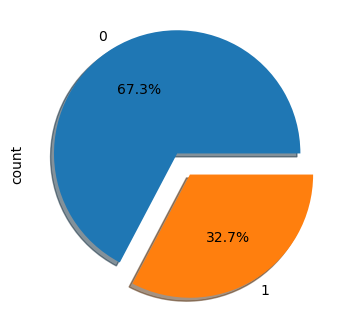

In [4]:
data['CATEGORY'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(4,4))

In [ ]:
X = data['sms'].values
Y = data['label'].values

# X = data['MESSAGE'].values
# Y = data['CATEGORY'].values

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    shuffle=True)

x_valid, x_test, y_valid, y_test = train_test_split(x_test,
                                                    y_test,
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    shuffle=True)
print('train:')
print(len(x_train))
print(len(y_train))

print('valid:')
print(len(x_valid))
print(len(y_valid))

print('test:')
print(len(x_test))
print(len(y_test))

train:
4057
4057
valid:
869
869
test:
870
870


In [7]:
vectorizer = TfidfVectorizer(max_features=200, stop_words=stop_words)

In [8]:
vectorizer.fit(x_train)
print(vectorizer.vocabulary_)

x_train_vect = vectorizer.transform(x_train)
x_valid_vect = vectorizer.transform(x_valid)
x_test_vect = vectorizer.transform(x_test)

{'wrote': 195, 'think': 169, 'mailman': 108, 'want': 187, 'mailing': 107, 'lists': 104, 'software': 152, 'linux': 101, 'users': 182, 'group': 76, 'ilug': 88, 'ie': 87, 'http': 85, 'www': 196, 'listinfo': 103, 'information': 91, 'list': 102, 'url': 178, 'com': 47, 'click': 43, 'date': 51, 'one': 125, 'us': 179, 'message': 114, 'content': 49, 'type': 177, 'text': 168, 'charset': 40, 'time': 170, 'people': 130, 'using': 183, 'web': 189, 'many': 111, 'could': 50, 'need': 120, 'company': 48, 'find': 64, 'much': 117, 'would': 194, 'even': 56, 'new': 122, 'form': 68, 'send': 144, 'work': 192, 'receive': 135, 'right': 139, 'number': 124, 'name': 118, 'mail': 106, 'address': 23, 'code': 44, 'html': 84, 'head': 77, 'meta': 115, '3d': 16, 'title': 172, 'body': 33, 'div': 54, 'table': 164, 'style': 161, 'border': 34, 'cellspacing': 38, '3d0': 17, 'cellpadding': 37, 'width': 191, '100': 5, 'tbody': 166, 'tr': 175, 'td': 167, 'img': 90, 'height': 78, 'src': 157, 'bgcolor': 31, 'nbsp': 119, 'margin':

In [9]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=0)
model_tree.fit(x_train_vect, y_train)

print('---------VALID--------')
predicted = model_tree.predict(x_valid_vect)
print(metrics.classification_report(y_valid, predicted))
print(metrics.confusion_matrix(y_valid, predicted))
    
print('---------TEST--------')
predicted = model_tree.predict(x_test_vect)
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

---------VALID--------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       583
           1       0.91      0.91      0.91       286

    accuracy                           0.94       869
   macro avg       0.93      0.93      0.93       869
weighted avg       0.94      0.94      0.94       869

[[558  25]
 [ 26 260]]
---------TEST--------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       591
           1       0.91      0.92      0.92       279

    accuracy                           0.95       870
   macro avg       0.94      0.94      0.94       870
weighted avg       0.95      0.95      0.95       870

[[565  26]
 [ 21 258]]


In [10]:
from sklearn.linear_model import LogisticRegression
model_reg = LogisticRegression(random_state=0, solver='liblinear')

model_reg.fit(x_train_vect, y_train)

print('---------VALID--------')
predicted = model_reg.predict(x_valid_vect)
print(metrics.classification_report(y_valid, predicted))
print(metrics.confusion_matrix(y_valid, predicted))
    
print('---------TEST--------')
predicted = model_reg.predict(x_test_vect)
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

---------VALID--------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       583
           1       0.99      0.94      0.97       286

    accuracy                           0.98       869
   macro avg       0.98      0.97      0.98       869
weighted avg       0.98      0.98      0.98       869

[[581   2]
 [ 16 270]]
---------TEST--------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       591
           1       1.00      0.92      0.96       279

    accuracy                           0.97       870
   macro avg       0.98      0.96      0.97       870
weighted avg       0.98      0.97      0.97       870

[[590   1]
 [ 21 258]]


In [12]:
from catboost import CatBoostClassifier
model_catboost = CatBoostClassifier(
    iterations=3000,
    learning_rate=0.8,
    verbose=5,
    custom_loss=['AUC', 'Accuracy']
)

model_catboost.fit(
    x_train_vect, y_train,
    eval_set=(x_valid_vect, y_valid),
)

0:	learn: 0.2883743	test: 0.3030786	best: 0.3030786 (0)	total: 205ms	remaining: 10m 13s
5:	learn: 0.1039900	test: 0.1384185	best: 0.1384185 (5)	total: 345ms	remaining: 2m 52s
10:	learn: 0.0730412	test: 0.1160335	best: 0.1160335 (10)	total: 466ms	remaining: 2m 6s
15:	learn: 0.0522650	test: 0.0928909	best: 0.0928909 (15)	total: 585ms	remaining: 1m 49s
20:	learn: 0.0409605	test: 0.0832504	best: 0.0832504 (20)	total: 702ms	remaining: 1m 39s
25:	learn: 0.0311376	test: 0.0795511	best: 0.0795511 (25)	total: 823ms	remaining: 1m 34s
30:	learn: 0.0263047	test: 0.0746374	best: 0.0746374 (30)	total: 956ms	remaining: 1m 31s
35:	learn: 0.0212838	test: 0.0733224	best: 0.0712706 (34)	total: 1.09s	remaining: 1m 29s
40:	learn: 0.0194496	test: 0.0718607	best: 0.0712706 (34)	total: 1.22s	remaining: 1m 28s
45:	learn: 0.0169401	test: 0.0680677	best: 0.0680677 (45)	total: 1.34s	remaining: 1m 25s
50:	learn: 0.0149497	test: 0.0685758	best: 0.0680677 (45)	total: 1.47s	remaining: 1m 25s
55:	learn: 0.0135073	test

In [13]:
print('---------VALID--------')
predicted = model_catboost.predict(x_valid_vect)
print(metrics.classification_report(y_valid, predicted))
print(metrics.confusion_matrix(y_valid, predicted))
    
print('---------TEST--------')
predicted = model_catboost.predict(x_test_vect)
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

---------VALID--------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       583
           1       0.97      0.97      0.97       286

    accuracy                           0.98       869
   macro avg       0.98      0.98      0.98       869
weighted avg       0.98      0.98      0.98       869

[[574   9]
 [  8 278]]
---------TEST--------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       591
           1       0.99      0.96      0.97       279

    accuracy                           0.98       870
   macro avg       0.98      0.98      0.98       870
weighted avg       0.98      0.98      0.98       870

[[587   4]
 [ 11 268]]
